In [13]:
from pathlib import Path
import pandas as pd
import cv2 as cv
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

thispath = Path.cwd().resolve()


pyhistdir = Path(thispath.parent / "data" / "Mask_PyHIST_v2")

metadata_slides = pd.read_csv(Path(pyhistdir / "metadata_slides.csv"), index_col=0)

count_patches = metadata_slides["number_patches"].sum()
count_filtered_patches = metadata_slides["number_filtered_patches"].sum() 

print(f"Number of patches in Mask_PyHist_v2: {count_patches}")
print(f"Number of filtered patches in Mask_PyHist_v2: {count_filtered_patches}")

plot_patches = pd.DataFrame(index=metadata_slides.index)
plot_patches = metadata_slides["number_filtered_patches"]


Number of patches in Mask_PyHist_v2: 4042499
Number of filtered patches in Mask_PyHist_v2: 2443635


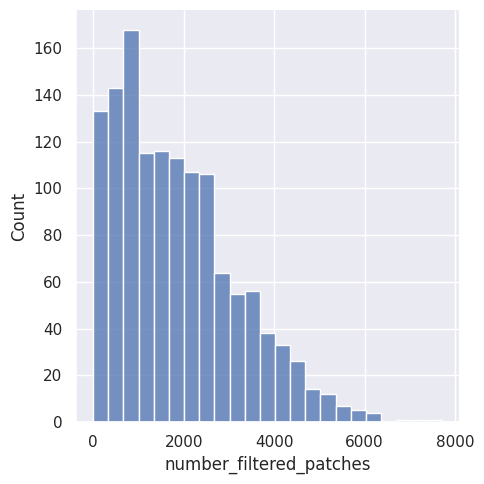

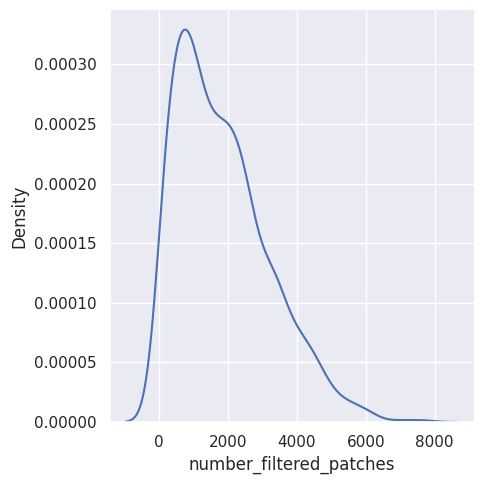

In [12]:
sns.set_theme()

sns.displot(plot_patches)
plt.show()

sns.displot(plot_patches, kind="kde")
plt.show()

# Save patches to inspect

In [26]:
wsi = "000030961000347399"

filtered_patches_csv_path_wsi = [i for i in pyhistdir.rglob("*.csv")
                                 if "_densely_filtered_path" in str(i) and wsi in str(i)]

print(filtered_patches_csv_path_wsi)
inspectdir = Path(pyhistdir / "inspect_one" / wsi)
Path(inspectdir).mkdir(exist_ok=True, parents=True)

filter_patches_one = pd.read_csv(filtered_patches_csv_path_wsi[0])

for path_patch in tqdm(filter_patches_one["filtered_patch_path"].items()):
    patch = cv.imread(path_patch[1])

    cv.imwrite(f"{inspectdir}/{Path(path_patch[1]).stem}.png", patch)


    

[PosixPath('/home/lluis/histo_lung/data/Mask_PyHIST_v2/LungAOEC_List1/000030961000347399/000030961000347399_densely_filtered_paths.csv')]


1292it [00:07, 174.85it/s]
